In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## I. Data Understanding

In [6]:
# Load dataset
df = pd.read_csv('loan_data_2007_2014.csv')

In [7]:
# Data overview
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Hapus kolom yang tidak relevan
df = df.drop(columns=['Unnamed: 0'])

In [43]:
# Analisis dimensi data
baris = df.shape[0]
kolom = df.shape[1]

print('Jumlah baris :', baris)
print('Jumlah kolom :', kolom)

Jumlah baris : 466285
Jumlah kolom : 74


In [9]:
# Memeriksa duplikasi data
if df.duplicated().any():
    print("Terdapat data duplikat")
else:
    print("Tidak terdapat data duplikat")


Tidak terdapat data duplikat


In [56]:
# Ringkasan statistik deskriptif untuk kolom numerik
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

In [70]:
# Ringkasan statistik deskriptif untuk kolom kategorikal
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


float64    46
object     22
int64       6
Name: count, dtype: int64


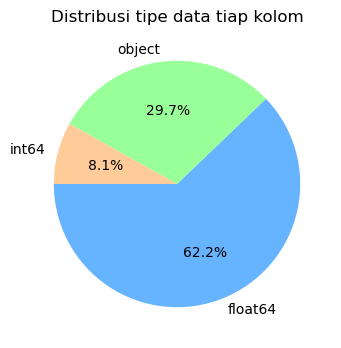

In [50]:
# Menghitung jumlah kolom berdasarkan tipe data
data_type_count = df.dtypes.value_counts()
print(data_type_count)


plt.figure(figsize=(6,4))
data_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi tipe data tiap kolom')
plt.ylabel('')
plt.show()

In [73]:
# Memeriksa jumlah nilai null untuk setiap kolom
print(df.isna().sum())

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

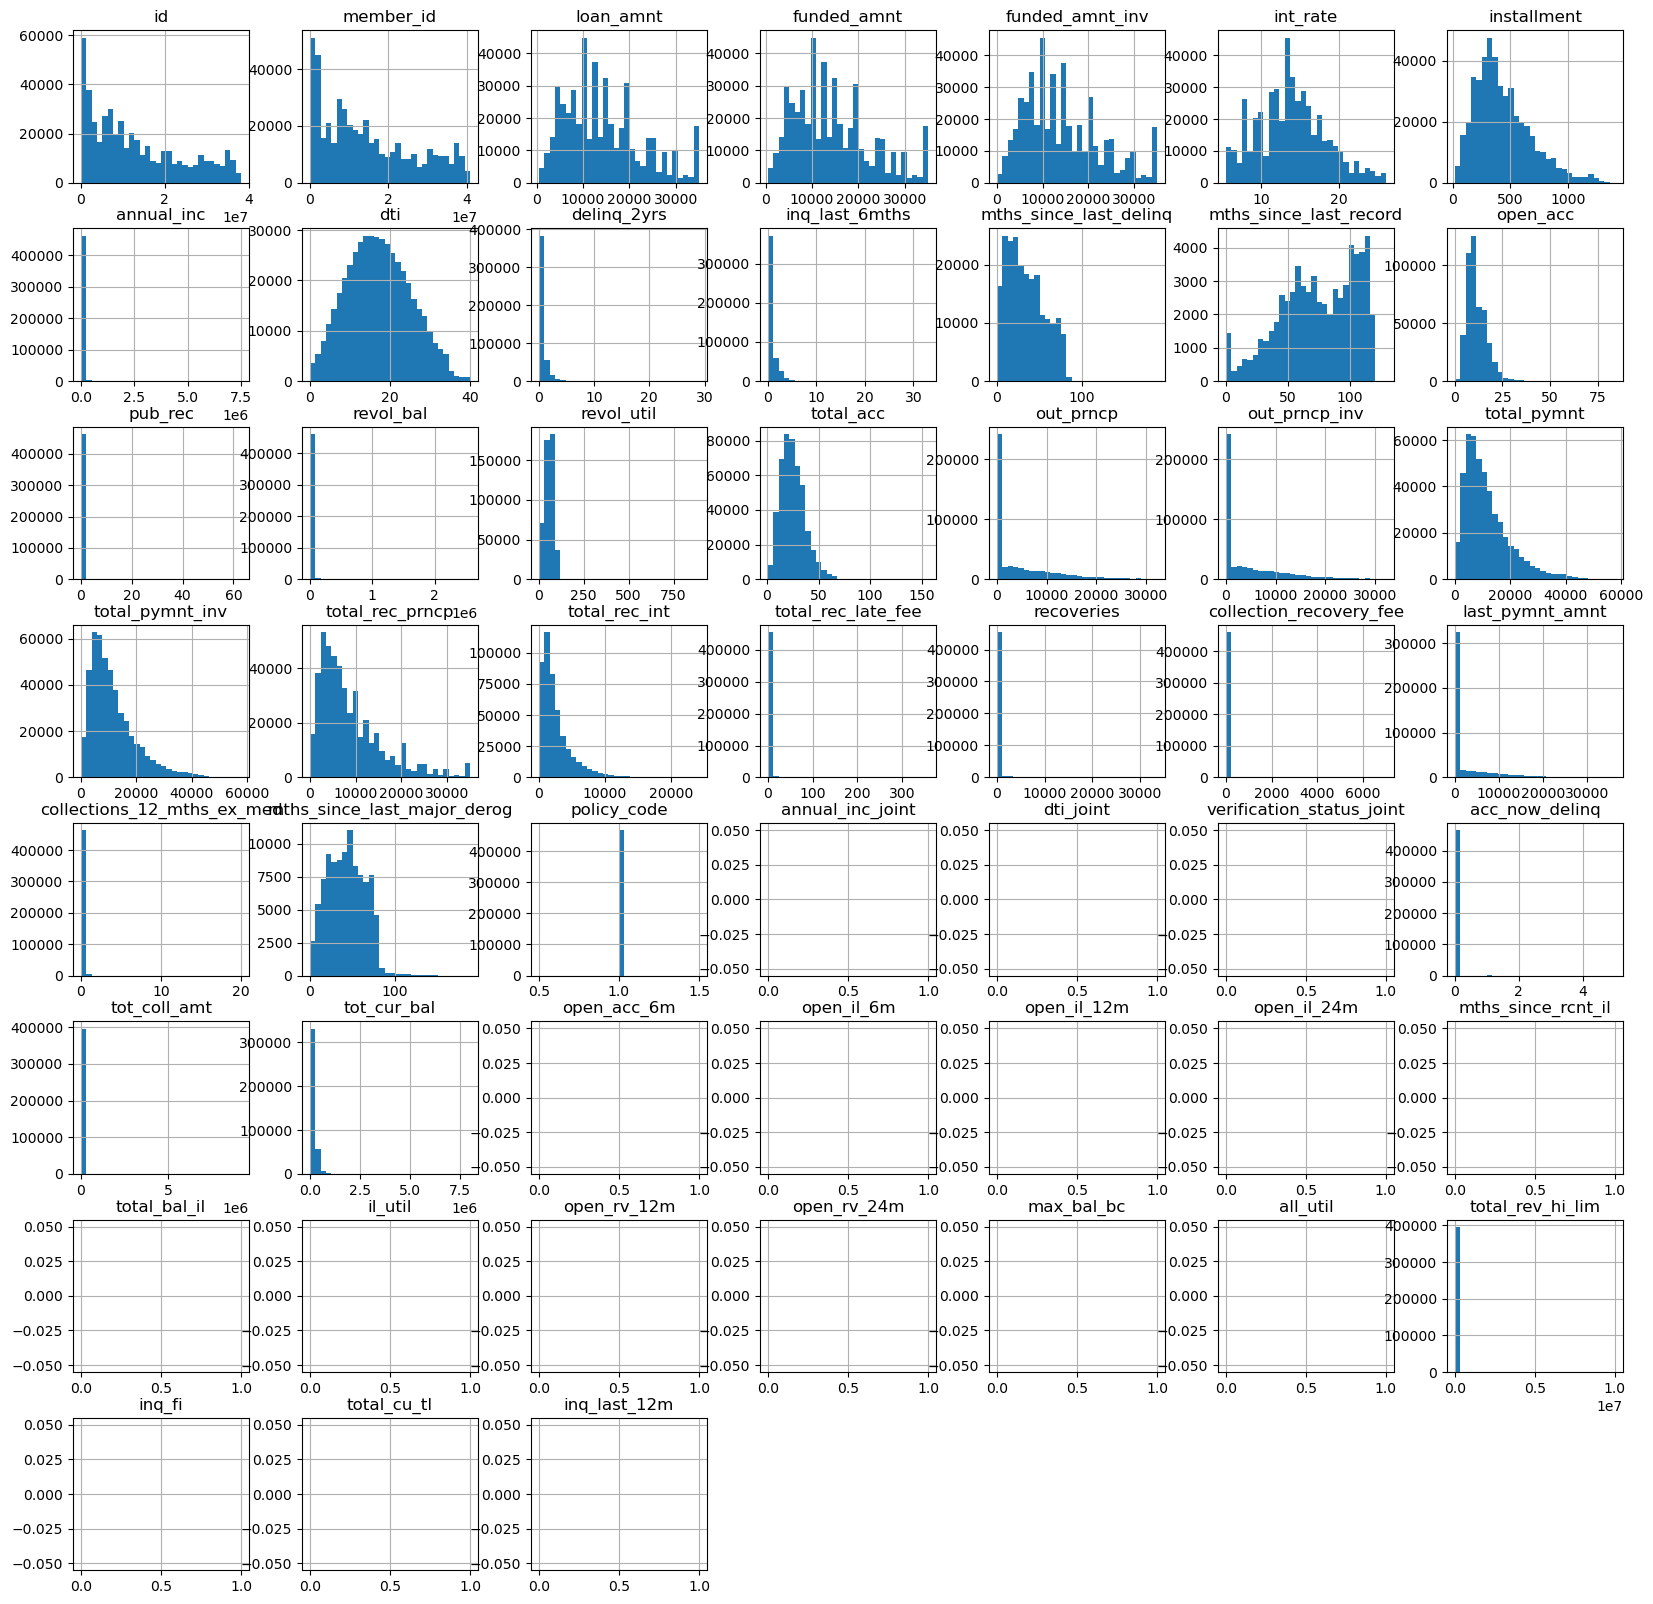

In [77]:
# Memeriksa distribusi data numerik
df.hist(bins=30, figsize=(20,20))
plt.show()

In [22]:
# Memeriksa distribusi data numerikal (int64 & float)
type_int = df.select_dtypes(include='int64').columns
type_float = df.select_dtypes(include='float64').columns

numeric_features = [feat for feat in df.columns if df[feat].dtypes != 'O']
print('Jumlah variabel numerik: ', len(numeric_features))

print('Distribusi data kolom bertipe integer : ')
print(df[type_int].nunique().sort_values(ascending=False))
print('====='*10)
print('Distribusi data kolom bertipe float : ')
print(df[type_float].nunique().sort_values(ascending=False))

Jumlah variabel numerik:  53
Distribusi data kolom bertipe integer : 
Unnamed: 0     466285
id             466285
member_id      466285
revol_bal       58142
funded_amnt      1354
loan_amnt        1352
policy_code         1
dtype: int64
Distribusi data kolom bertipe float : 
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_int                  270249
tot_cur_bal                    220690
last_pymnt_amnt                198194
total_rec_prncp                172713
out_prncp_inv                  141189
out_prncp                      135665
installment                     55622
annual_inc                      31901
recoveries                      22773
collection_recovery_fee         20275
total_rev_hi_lim                14612
funded_amnt_inv                  9854
tot_coll_amt                     6321
total_rec_late_fee               5808
dti                              3997
revol_util                       1269
int_rate                          506
mt

Kolom bertipe data integer yaitu id dan member_id akan dihapus karena data tidak berguna untuk prediksi. 
Kolom bertipe data float yang memiliki jumlah unik/nunique() = 0 akan dihapus juga karena nilainya nan alias missing value.

In [98]:
# Memeriksa distribusi data kategorikal (object)
type_object = df.select_dtypes(include='object').columns
print('Distribusi data kolom bertipe object : ')
print(df[type_object].nunique().sort_values(ascending=False))

Distribusi data kolom bertipe object : 
url                    466285
emp_title              205475
desc                   124435
title                   63098
zip_code                  888
earliest_cr_line          664
last_credit_pull_d        103
next_pymnt_d              100
last_pymnt_d               98
issue_d                    91
addr_state                 50
sub_grade                  35
purpose                    14
emp_length                 11
loan_status                 9
grade                       7
home_ownership              6
verification_status         3
term                        2
initial_list_status         2
pymnt_plan                  2
application_type            1
dtype: int64


hapus kolom kategorikal yang terlalu tinggi kardinalitasnya/hampir seluruhnya unik :
url - issue_d
dan application_type (karena hanya satu jenis)


## II. Exploratory Data Analysis (EDA)

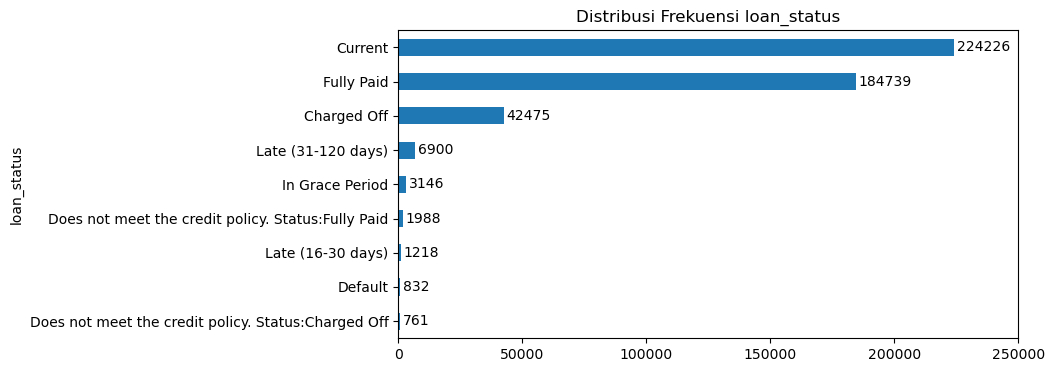

In [68]:
# Analisis Univariat
loan_status_count = df['loan_status'].value_counts(ascending=True)

plt.figure(figsize=(8,4))
loan_status_count.plot(kind='barh')
plt.title('Distribusi Frekuensi loan_status')
plt.xlim(0, 250000)

for index, value in enumerate(loan_status_count):
    plt.annotate(f'{value}', xy=(value, index), xytext=(value + 1000, index),
        va='center', ha='left', color='black')
plt.show()

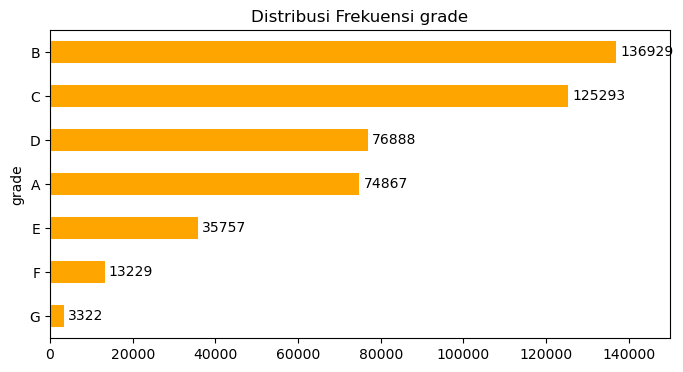

In [67]:
# Analisis Univariat
grade_count = df['grade'].value_counts(ascending=True)

plt.figure(figsize=(8,4))
grade_count.plot(kind='barh', color='orange')
plt.title('Distribusi Frekuensi grade')
plt.xlim(0, 150000)

for index, value in enumerate(grade_count):
    plt.annotate(f'{value}', xy=(value, index), xytext=(value + 1000, index),
        va='center', ha='left', color='black')
plt.show()


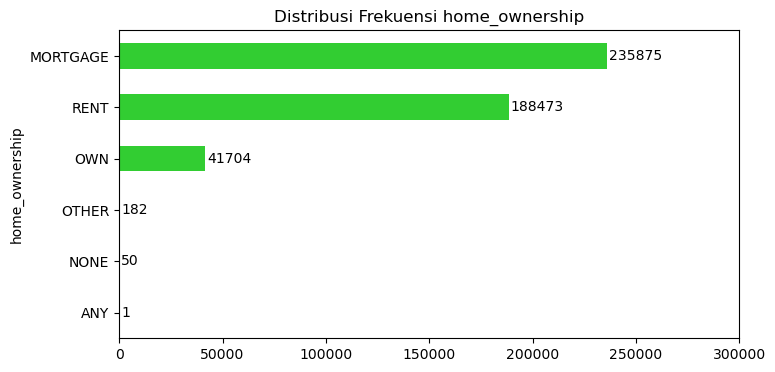

In [69]:
# Analisis Univarit
home_ownership_count = df['home_ownership'].value_counts(ascending=True)

plt.figure(figsize=(8,4))
home_ownership_count.plot(kind='barh', color='limegreen')
plt.title('Distribusi Frekuensi home_ownership')
plt.xlim(0, 300000)

for index, value in enumerate(home_ownership_count):
    plt.annotate(f'{value}', xy=(value, index), xytext=(value + 1000, index),
        va='center', ha='left', color='black')
plt.show()


> data home_ownership atau status kepemilikan rumah yang diberikan oleh peminjam pada saat pendaftaran didominasi oleh 3 kategori yaitu Mortgage (KPR) sejumlah 235875, Rent (Sewa) sejumlah 188473, dan OWN (Milik Sendiri) sejumlah 41704.

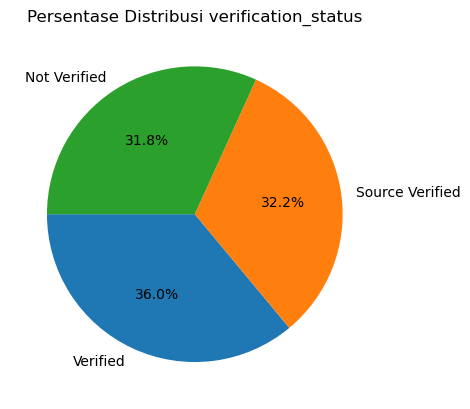

In [72]:
# Analisis Univariat
verif_status_count = df['verification_status'].value_counts()

verif_status_count.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Persentase Distribusi verification_status')
plt.ylabel('')
plt.show()

>data verification_status menunjukkan data pendapatan peminjam yang telah terverifikasi sejumlah 168055 atau setara 36.0%, yang belum terverifikasi sejumlah 148237 atau setara 31.8%, dan yang sumber pendapatannya telah diverifikasi sejumlah  149993 atau setara 32.2%.

In [ ]:
# Melihat korelasi antar fitur/kolom
# corr = df.corr()
# plt.figure(figsize=(20,12))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='rocket_r')
# plt.title('Plot Correlation Matrix', size=20)
# plt.show()